# **Modelo LeNet5**

# **MODELO UTILIZADO**

## **modelo basado en LeNet_5_Digits_MNIST.ipynb**

# **Adrian Pineda Sanchez A00834710**

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from numpy import array
from sklearn.metrics import classification_report
import time
from sklearn.metrics import confusion_matrix
import sklearn.model_selection as model_selection
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

4422102/4422102 [==============================] - 0s 0us/step


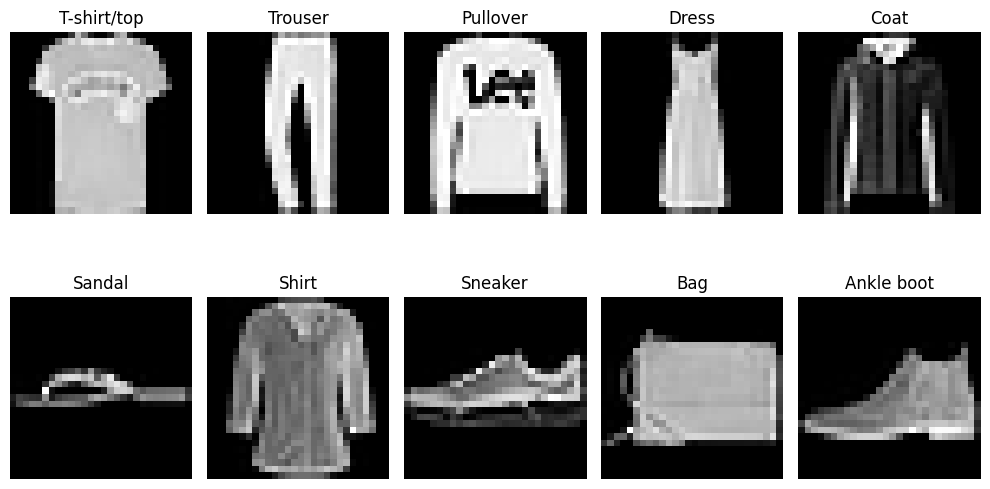

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

# Cargar el conjunto de datos Fashion MNIST
(_, _), (x_test, y_test) = fashion_mnist.load_data()

# Definir las etiquetas de Fashion MNIST
fashion_labels = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Imprimir una imagen de cada clase
plt.figure(figsize=(10, 6))
for i in range(10):
    index = (y_test == i).nonzero()[0][0]
    image = x_test[index]
    plt.subplot(2, 5, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(fashion_labels[i])
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# Cargar el conjunto de datos Fashion MNIST
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalizar los valores de píxeles al rango [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Agregar una dimensión para el canal de color (1 en escala de grises)
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

# Convertir etiquetas a formato one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


In [ ]:
# despliega las dimensiones de los arreglos
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)


In [ ]:
fashion_labels = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

In [ ]:
# Crear el modelo LeNet-5 para Fashion MNIST
model = Sequential([
    # C1: feature maps - Convolutional layer:
    Conv2D(filters=6, kernel_size=(5,5), strides=(1,1), padding='same', activation='tanh', input_shape=(28, 28, 1)),

    # S2: Subsampling - Pooling layer:
    MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),

    # C3: feature maps: Convolutional layer:
    Conv2D(filters=16, kernel_size=(5,5), strides=(1,1), padding='valid', activation='tanh'),

    # S4: Subsampling - Pooling layer:
    MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),

    # C5: Flatten & Fully connection:
    Flatten(),
    Dense(120, activation='tanh'),

    # F6: Fully conection:
    Dense(84, activation='tanh'),

    # Output: Softmax
    Dense(10, activation='softmax')
])

In [ ]:
# Sección 2: Define algunos hiper-parámetros
n_epochs = 10
n_batch = 128
learning_rate = 0.01
opt = tf.keras.optimizers.Adam()



In [ ]:
# Sección 3: Configura el modelo para entrenamiento
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Sección 4: Entrena el modelo para un número fijo de épocas
Historia = model.fit(x_train, y_train, validation_data=(x_test, y_test),
                     epochs=n_epochs, batch_size=n_batch)


Epoch 1/10
469/469 [==============================] - 48s 101ms/step - loss: 0.2372 - accuracy: 0.9131 - val_loss: 0.2856 - val_accuracy: 0.8945
Epoch 2/10
469/469 [==============================] - 41s 88ms/step - loss: 0.2238 - accuracy: 0.9167 - val_loss: 0.2813 - val_accuracy: 0.8980
Epoch 3/10
469/469 [==============================] - 42s 89ms/step - loss: 0.2115 - accuracy: 0.9223 - val_loss: 0.2971 - val_accuracy: 0.8953
Epoch 4/10
469/469 [==============================] - 40s 84ms/step - loss: 0.2002 - accuracy: 0.9266 - val_loss: 0.2887 - val_accuracy: 0.8966
Epoch 5/10
469/469 [==============================] - 46s 97ms/step - loss: 0.1894 - accuracy: 0.9301 - val_loss: 0.2767 - val_accuracy: 0.9037
Epoch 6/10
469/469 [==============================] - 41s 88ms/step - loss: 0.1797 - accuracy: 0.9330 - val_loss: 0.2824 - val_accuracy: 0.9008
Epoch 7/10
469/469 [==============================] - 42s 90ms/step - loss: 0.1702 - accuracy: 0.9375 - val_loss: 0.2712 - val_accuracy

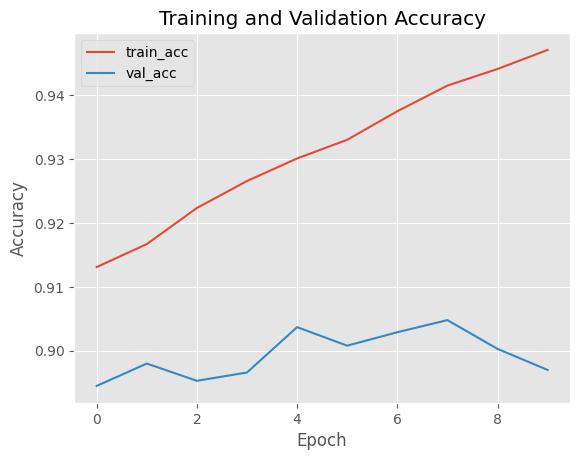

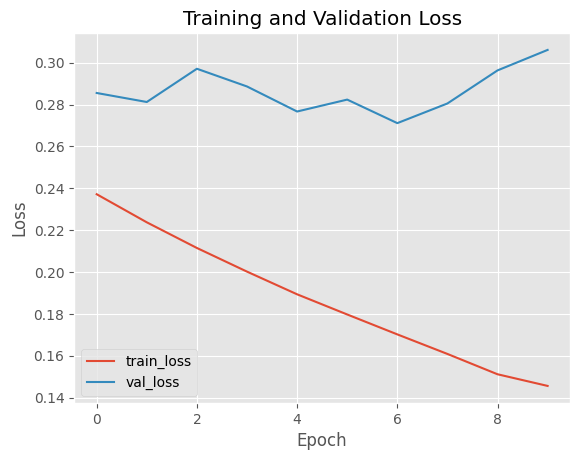

In [ ]:
# Despliega las curvas de aprendizaje
H = Historia
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,n_epochs),H.history["accuracy"],label="train_acc")
plt.plot(np.arange(0,n_epochs),H.history["val_accuracy"],label="val_acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.figure()
plt.plot(np.arange(0,n_epochs),H.history["loss"],label="train_loss")
plt.plot(np.arange(0,n_epochs),H.history["val_loss"],label="val_loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [ ]:
predictions = model.predict(x_test, batch_size=n_batch)
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names=fashion_labels))


79/79 [==============================] - 3s 34ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.84      0.88      0.86      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.79      0.89      0.83      1000
       Dress       0.89      0.92      0.91      1000
        Coat       0.82      0.85      0.83      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.81      0.61      0.70      1000
     Sneaker       0.97      0.91      0.94      1000
         Bag       0.97      0.98      0.97      1000
  Ankle boot       0.92      0.98      0.95      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [ ]:
# Matriz de confusión
confusion_matrix(y_test.argmax(axis=1), predictions.argmax(axis=1))

array([[879,   0,  26,  19,   4,   1,  62,   0,   9,   0],
       [  2, 973,   2,  18,   3,   0,   1,   0,   1,   0],
       [ 16,   0, 885,   9,  49,   0,  37,   0,   4,   0],
       [ 11,   4,  16, 924,  28,   0,  13,   0,   4,   0],
       [  1,   1,  87,  32, 846,   0,  31,   0,   2,   0],
       [  0,   0,   0,   0,   0, 981,   0,   7,   0,  12],
       [136,   1, 101,  29, 107,   0, 614,   0,  12,   0],
       [  0,   0,   0,   0,   0,  16,   0, 914,   0,  70],
       [  1,   1,   4,   9,   1,   2,   1,   2, 977,   2],
       [  0,   0,   0,   0,   0,   5,   0,  17,   1, 977]])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 6)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

In [ ]:
# Cantidad de parámetros de la red
print("Parámetros del Layer conv2d: " + str( 1 * (5*5) * 6 + 6 ))
print("Parámetros del Layer conv2d_1: " + str( 6 * (5*5) * 16 + 16 ))
print("Parámetros del Layer dense_1_1: " + str( 16 * (5*5) * 120 + 120 ))
print("Parámetros del Layer dense_1_1: " + str( 120 * (84) + 84 ))
print("Parámetros del Layer conv2d_1: " + str( 84 * (10) + 10 ))

Parámetros del Layer conv2d: 156
Parámetros del Layer conv2d_1: 2416
Parámetros del Layer dense_1_1: 48120
Parámetros del Layer dense_1_1: 10164
Parámetros del Layer conv2d_1: 850


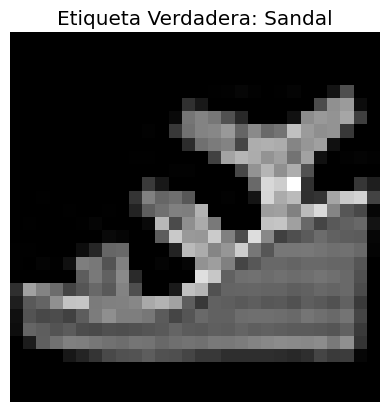

1/1 [==============================] - 0s 23ms/step
Etiqueta Verdadera: Sandal
T-shirt/top: 0.00002
Trouser: 0.00000
Pullover: 0.00000
Dress: 0.00000
Coat: 0.00000
Sandal: 0.99986
Shirt: 0.00000
Sneaker: 0.00000
Bag: 0.00004
Ankle boot: 0.00008
Predicción del modelo: Sandal
El modelo acertó en su predicción.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Cargar y preprocesar los datos de prueba
(_, _), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalización de los datos
x_test = x_test.reshape((-1, 28, 28, 1)).astype('float32') / 255.0

# Definir las etiquetas de Fashion MNIST
fashion_labels = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Seleccionar una imagen aleatoria del conjunto de pruebas
index = np.random.randint(0, len(x_test))
sample_image = x_test[index]
true_label = y_test[index]

# Mostrar la imagen seleccionada junto con la etiqueta verdadera
plt.imshow(sample_image.squeeze(), cmap='gray')
plt.title(f"Etiqueta Verdadera: {fashion_labels[true_label]}")
plt.axis('off')
plt.show()

# Realizar la predicción con el modelo cargado (reemplaza 'model' con tu modelo LeNet)
predicted = model.predict(np.expand_dims(sample_image, axis=0))

# Imprimir la etiqueta verdadera y las probabilidades de predicción
print(f"Etiqueta Verdadera: {fashion_labels[true_label]}")

for i, prob in enumerate(predicted[0]):
    print(f"{fashion_labels[i]}: {prob:.5f}")

# Imprimir la predicción del modelo
predicted_label = np.argmax(predicted)
predicted_class = fashion_labels[predicted_label]

print(f"Predicción del modelo: {predicted_class}")

# Comprobar si la predicción es correcta y mostrar la etiqueta verdadera
if predicted_label == true_label:
    print(f"El modelo acertó en su predicción.")
else:
    true_class = fashion_labels[true_label]
    print(f"El modelo no acertó en su predicción. La etiqueta verdadera era: {true_class}")

In [ ]:
import numpy as np

# Cargar y preprocesar los datos de prueba
(_, _), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalización de los datos
x_test = x_test.reshape((-1, 28, 28, 1)).astype('float32') / 255.0

# Definir las etiquetas de Fashion MNIST
fashion_labels = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Contador de aciertos
aciertos = 0

# Realizar 100 experimentos aleatorios
for _ in range(100):
    # Seleccionar una imagen aleatoria del conjunto de pruebas
    index = np.random.randint(0, len(x_test))
    sample_image = x_test[index]
    true_label = y_test[index]

    # Realizar la predicción con el modelo cargado (reemplaza 'model' con tu modelo LeNet)
    predicted = model.predict(np.expand_dims(sample_image, axis=0))
    predicted_label = np.argmax(predicted)

    # Verificar si la predicción es correcta
    if predicted_label == true_label:
        aciertos += 1

# Imprimir el número de aciertos
print(f"Total de aciertos en 100 experimentos: {aciertos}")


1/1 [==============================] - 0s 21ms/step
Total de aciertos en 100 experimentos: 84
